In [49]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# import cleaned and transformed dataset
df = pd.read_csv("../data/df_numeric_transformed.csv")

In [2]:
df.head()

,Unnamed: 0,Gender,Married,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,TotalIncome_log,Loan_Status
0,0,1,1,1,0,128.0,360.0,1,1,0,0,0,1,0,0,8.714568,0
1,1,1,1,1,1,66.0,360.0,1,0,0,1,1,0,0,0,8.006401,1
2,2,1,1,0,0,120.0,360.0,1,0,0,1,1,0,0,0,8.505323,1
3,3,1,0,1,0,141.0,360.0,1,0,0,1,1,0,0,0,8.699531,1
4,4,1,1,1,1,267.0,360.0,1,0,0,1,0,0,1,0,9.170872,1


In [3]:
df.drop(columns= "Unnamed: 0", inplace=True)

Train-Test Split

In [4]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = df.drop(columns='Loan_Status', axis=1)
y = df['Loan_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scale

In [5]:
# Import and create an instance of the StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the StandardScaler to the data
scaler.fit(X_train)

# Transform the data using the StandardScaler
X_train_scaled = scaler.transform(X_train)

PCA

In [6]:
from sklearn.decomposition import PCA
# pca = PCA(n_components = 3)
# pca.fit (X_train_scaled)

# print(pca.explained_variance_ratio_)

# not going to use it as it didn't improve results

Select K Best Features

In [7]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [8]:
# Select the top k features using SelectKBest
# SelectKBest function uses statistical tests such as chi-squared, ANOVA, 
# or mutual information to score each feature,
# selector = SelectKBest(f_classif, k=5)
# selector.fit(X_train_scaled, y_train)

# Get the indices of the selected features
# selected_features = selector.get_support(indices=True)
# selected_features

# not going to use it as i will include all relevant columns

Get accuracy indicators

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

XG Boost on unscaled data

In [10]:
import xgboost as xgb
from xgboost import XGBClassifier

# Fit the XGBoost model
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test data
y_pred = xgb_model.predict(X_test)

# Calculate accuracy, precision, recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# print results
print("Accuracy: {:.3f}".format(accuracy))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))

Accuracy: 0.825
Precision: 0.872
Recall: 0.895


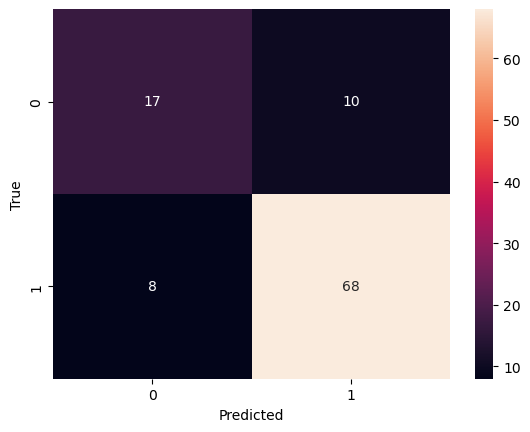

In [11]:
# Calculate the confusion matrix
confused = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(confused, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

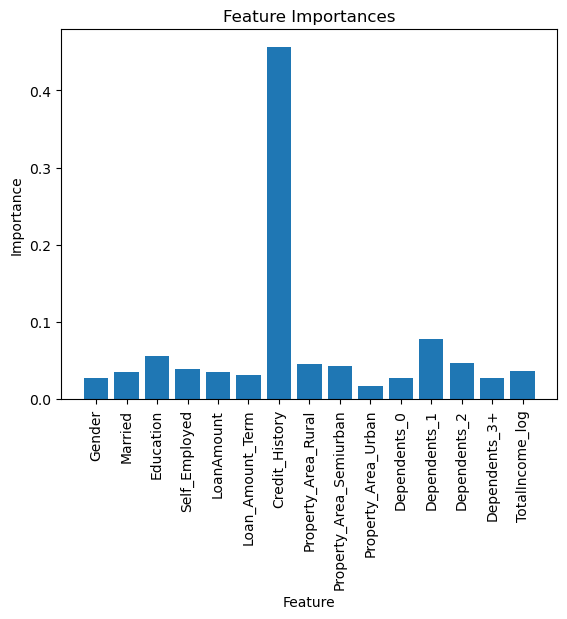

In [12]:
# Plot the feature importances
plt.bar(range(len(xgb_model.feature_importances_)), xgb_model.feature_importances_)
plt.xticks(range(len(xgb_model.feature_importances_)), X_train.columns, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.show()

Gaussian Naive Bayes on unscaled data

In [13]:
from sklearn.naive_bayes import GaussianNB

# Create an instance of the Gaussian Naive Bayes classifier
NBmodel = GaussianNB()

# Fit the model to the training data
NBmodel.fit(X_train, y_train)

# Predict on the test data
y_pred = NBmodel.predict(X_test)

# Calculate accuracy, precision, recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# print results
print("Accuracy: {:.3f}".format(accuracy))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))

Accuracy: 0.854
Precision: 0.851
Recall: 0.974


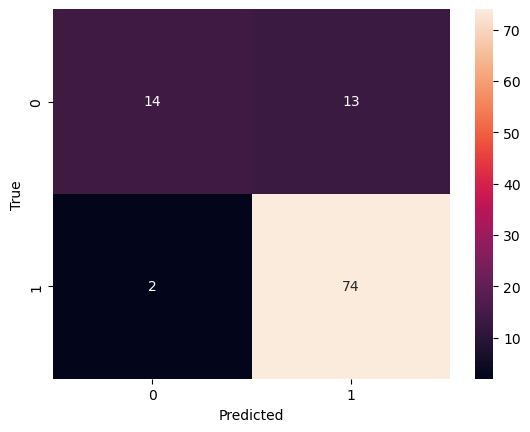

In [14]:
# Calculate the confusion matrix
confused = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(confused, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# nb can't plot feature importances using a GNB function call (though there may be other ways)

Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the RandomForestClassifier class
RFmodel = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
RFmodel.fit(X_train, y_train)

# Predict on the test data
y_pred = RFmodel.predict(X_test)
y_pred = np.array(y_pred)

# Calculate accuracy, precision, recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# print results
print("Accuracy: {:.3f}".format(accuracy))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))

Accuracy: 0.835
Precision: 0.855
Recall: 0.934


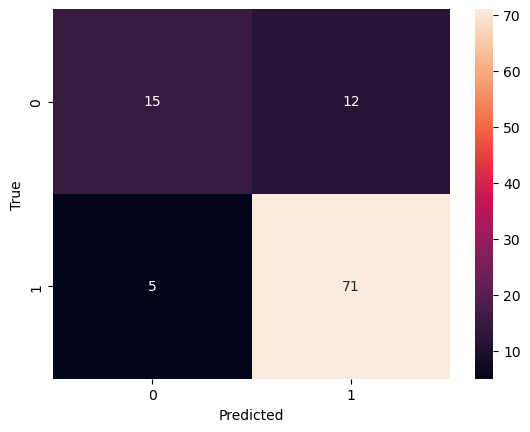

In [16]:
# Calculate the confusion matrix
confused = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(confused, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the logistic regression class
LRmodel = LogisticRegression(random_state=42)

# Fit the model to the training data
LRmodel.fit(X_train, y_train)

# Predict on the test data
y_pred = LRmodel.predict(X_test)

# Calculate accuracy, precision, recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# print results
print("Accuracy: {:.3f}".format(accuracy))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))

Accuracy: 0.854
Precision: 0.843
Recall: 0.987


c:\Users\emily\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


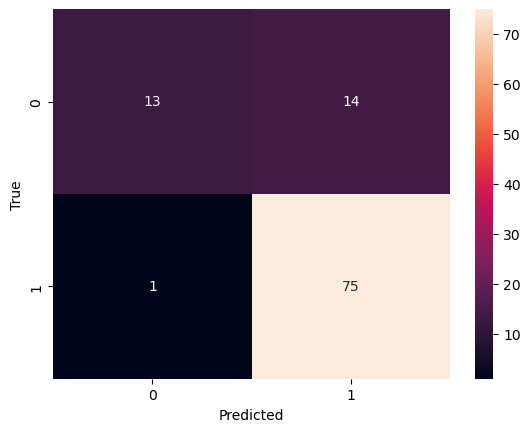

In [18]:
# Calculate the confusion matrix
confused = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(confused, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Grid Search to tune parameters

In [48]:
# TAKING TOO LONG TO RUN THIS WAY

""" 
# Define the pipeline steps
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('voting', VotingClassifier(estimators=[('xgb', XGBClassifier()), 
                                            ('gnb', GaussianNB()),
                                            ('rfc', RandomForestClassifier())]))
])

# Define the grid search parameters
param_grid = {
    'voting__weights': [[1, 1, 1], [2, 1, 1], [1, 2, 1], [1, 1, 2]],
    'voting__xgb__max_depth': [3, 5, 7],
    'voting__xgb__n_estimators': [50, 100, 150],
    'voting__gnb__var_smoothing': [1e-9, 1e-10],
    'voting__rfc__max_depth': [3, 5, 7],
    'voting__rfc__n_estimators': [50, 100, 150],
    'voting__rfc__min_samples_leaf': [1, 2, 4]
}
"""


In [ ]:
"""
# Create the GridSearchCV object
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)

# Evaluate the best model on the test set
y_pred = grid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy: ", accuracy)
"""

In [61]:
# DO IT FOR RANDOM FOREST ONLY

# create param grid
param_grid = {
    'max_depth': [1, 2, 3],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [1, 2, 3],
    'n_estimators': [1, 2, 3],
}

In [62]:
# Create GridSearchCV
grid = GridSearchCV(RFmodel, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)


Best parameters:  {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1}
Best score:  0.8247428739347633


c:\Users\emily\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
135 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\emily\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\emily\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "c:\Users\emily\anaconda3\lib\site-packages\joblib\parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\Users\emily\anaconda3\lib\site-packages

In [69]:
# DO IT FOR XG BOOST

# create param grid
param_grid = {
    'learning_rate': [0.000001, 0.00001, 0.0001],
    'max_depth': [1, 2, 3],
    'n_estimators': [1, 2, 3],
}

In [70]:
# Create GridSearchCV
grid = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)


Best parameters:  {'learning_rate': 1e-06, 'max_depth': 1, 'n_estimators': 1}
Best score:  0.8247428739347633


Pickle file

In [71]:
rf_model_final = RandomForestClassifier( max_depth = 1,
                                        min_samples_leaf = 1,
                                        min_samples_split = 2, 
                                        n_estimators = 1)

rf_model_final.fit(X_train, y_train)

RandomForestClassifier(max_depth=1, n_estimators=1)

In [73]:
import pickle

# train your model here
#model = RandomForestClassifier(n_estimators=100)
#model.fit(X_train, y_train)

# pickle the model
with open('final_model.pkl', 'wb') as f:
    pickle.dump(rf_model_final, f)